In [33]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import math

In [34]:
data = pd.read_csv("Complete_musicDB.csv")
Y = np.floor(data.year);
X = data.drop('year', axis = 1)

In [53]:
song_title = data['title']
artist = data['artist_name']
song_artist = song_title.join(artist)
print(song_artist)

AttributeError: 'Series' object has no attribute 'join'

In [35]:
print(X.columns)

Index(['artist_familiarity', 'artist_hotttnesss', 'artist_id', 'artist_mbid',
       'artist_playmeid', 'artist_7digitalid', 'artist_latitude',
       'artist_longitude', 'artist_location', 'artist_name', 'release',
       'release_7digitalid', 'song_id', 'song_hotttnesss', 'title',
       'track_7digitalid', 'similar_artists', 'artist_terms',
       'artist_terms_freq', 'artist_terms_weight', 'analysis_sample_rate',
       'audio_md5', 'danceability', 'duration', 'end_of_fade_in', 'energy',
       'key', 'key_confidence', 'loudness', 'mode', 'mode_confidence',
       'start_of_fade_out', 'tempo', 'time_signature',
       'time_signature_confidence', 'track_id', 'segments_start',
       'segments_confidence', 'segments_pitches', 'segments_timbre',
       'segments_loudness_max', 'segments_loudness_max_time',
       'segments_loudness_start', 'sections_start', 'sections_confidence',
       'beats_start', 'beats_confidence', 'bars_start', 'bars_confidence',
       'tatums_start', 'tatums

In [36]:
print(X['artist_terms'][0])
print(X['artist_terms'][1])

['hip hop' 'underground rap' 'g funk' 'alternative rap' 'gothic rock'
 'west coast rap' 'rap' 'club dance' 'singer-songwriter' 'chill-out'
 'underground hip hop' 'rock' 'gothic' 'san francisco bay area' 'indie'
 'american' 'punk' 'california' 'industrial' 'new york' '90s' 'latin'
 'spanish' 'dark' 'ebm' 'underground' 'deathrock' 'west coast'
 'san francisco' 'producer' 'oakland' 'catalan' 'barcelona' 'doomsdope'
 'norcal' 'west coast hip hop' 'alternative rock']
['blue-eyed soul' 'pop rock' 'blues-rock' 'beach music' 'soft rock' 'soul'
 'classic rock' 'oldies' 'power pop' 'psychedelic rock' 'rock'
 'sunshine pop' 'blues' 'singer-songwriter' 'pop' 'united states'
 'male vocalist' "rock 'n roll" '60s' 'am pop' 'r&b' 'american' 'male'
 'psychedelic' 'classic' 'vocal' 'americana' 'game music' 'mod' 'trippy'
 'french' 'germany' 'canada' '70s' 'belgium' 'cover' 'nederland'
 'confident']


In [37]:
rows = data.shape[0]
for cur in range(0, rows):
    #take out rows with no years
    if(Y[cur] == 0 or math.isnan(Y[cur])):
#         print(Y[cur], cur)
        Y = Y.drop(cur, axis=0)
        X = X.drop(cur, axis=0)
    else:
        #floor the year
        Y[cur] = math.floor(Y[cur]/10) * 10
# print(Y)

In [7]:
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OneHotEncoder

# label_encoder = LabelEncoder()
# integer_encoded = label_encoder.fit_transform (X['artist_terms'])

# onehot_encoder = OneHotEncoder(sparse=False)
# integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
# onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

# print(onehot_encoded[0])

# categories = ['classical', 'rock', 'pop', 'rap', 'blues', 'country', 'electronic', 'jazz', 'folk', 'latin']

In [38]:
for column in X:
    if isinstance(X[column][0], str) and column != 'artist_terms':
        X = X.drop(column, axis = 1)

X = X.drop('track_7digitalid', axis = 1)
# X = X.drop('artist_7digitalid', axis = 1)
X = X.drop('release_7digitalid', axis = 1)
# print(X.head)

In [39]:
print(X.columns)

Index(['artist_familiarity', 'artist_hotttnesss', 'artist_playmeid',
       'artist_7digitalid', 'artist_latitude', 'artist_longitude',
       'song_hotttnesss', 'artist_terms', 'analysis_sample_rate',
       'danceability', 'duration', 'end_of_fade_in', 'energy', 'key',
       'key_confidence', 'loudness', 'mode', 'mode_confidence',
       'start_of_fade_out', 'tempo', 'time_signature',
       'time_signature_confidence', 'acousticness', 'danceability.1',
       'duration_ms', 'energy.1', 'instrumentalness', 'key.1', 'liveness',
       'loudness.1', 'mode.1', 'speechiness', 'tempo.1', 'time_signature.1',
       'valence'],
      dtype='object')


In [40]:
#Fill the NA

# from sklearn.impute import SimpleImputer
# imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')
# X_nonNans = imp.fit_transform(X)
X_nonNans = X.fillna(method='ffill')
X_nonNans = X_nonNans.fillna(0)
# np.isnan(X_nonNans).any()
#print(X_nonNans)

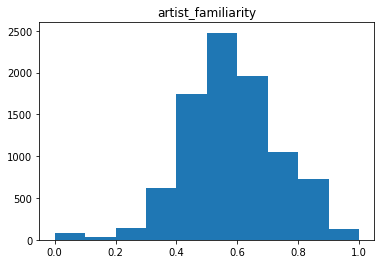

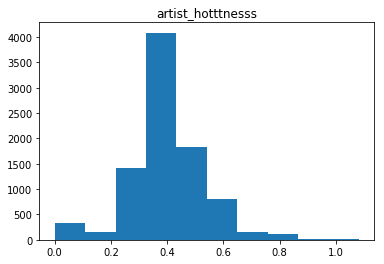

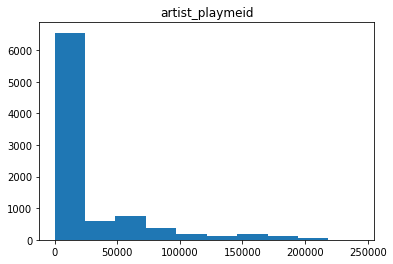

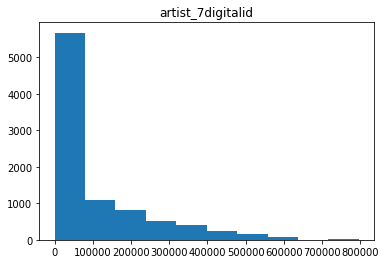

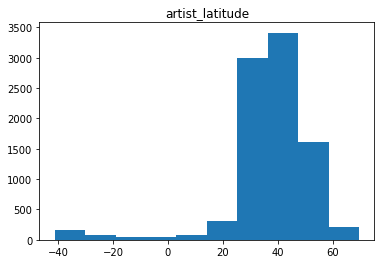

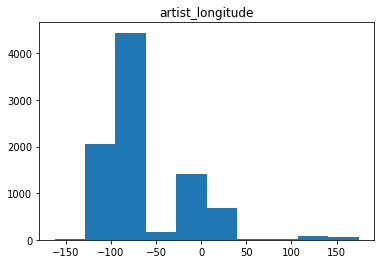

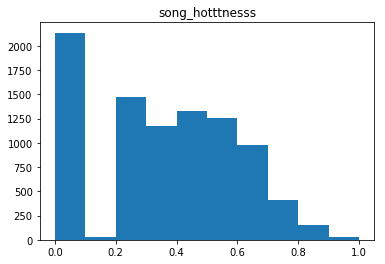

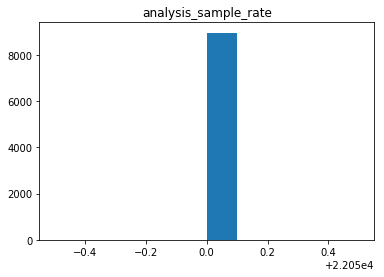

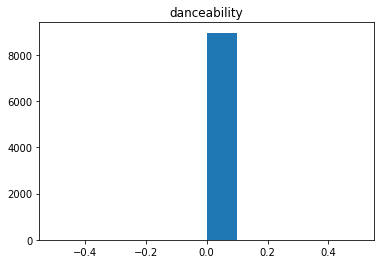

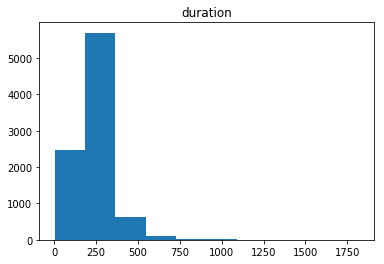

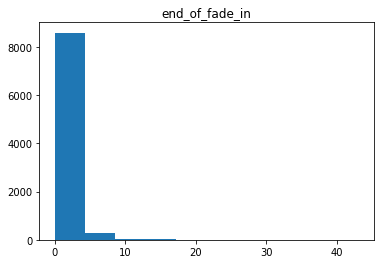

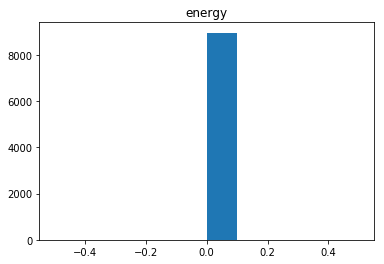

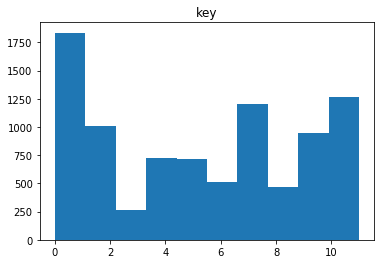

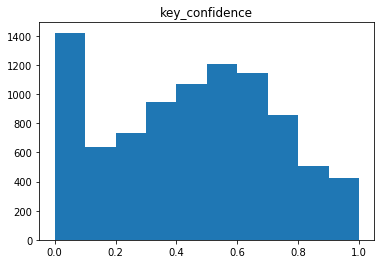

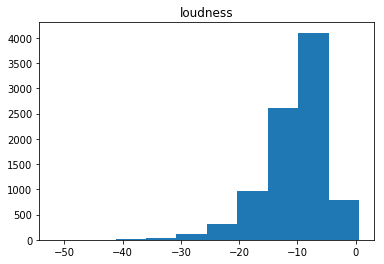

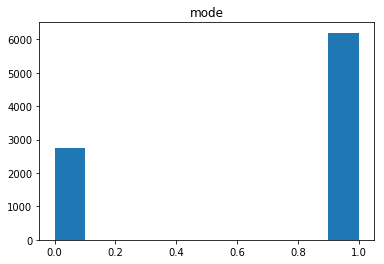

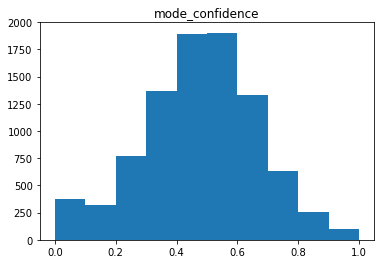

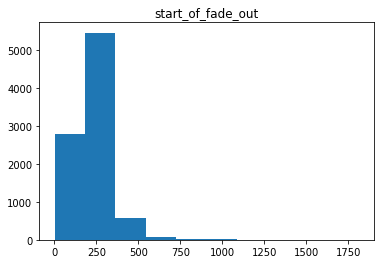

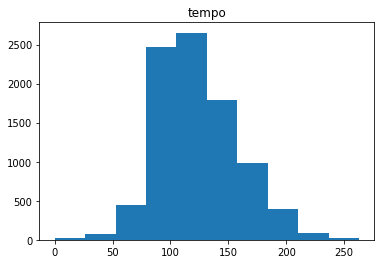

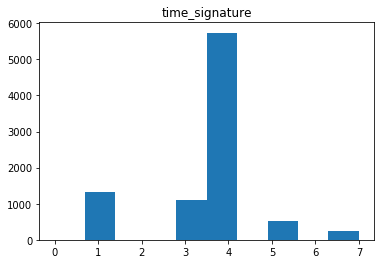

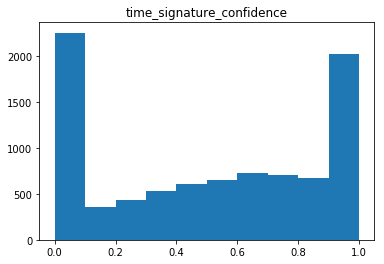

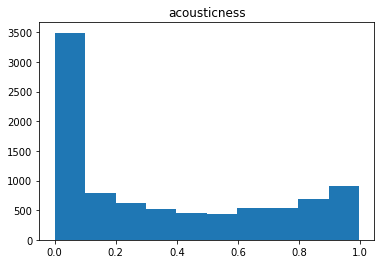

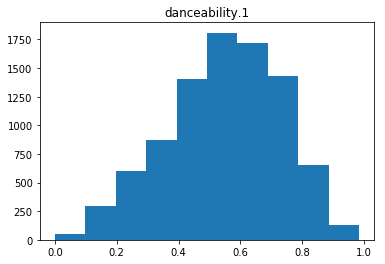

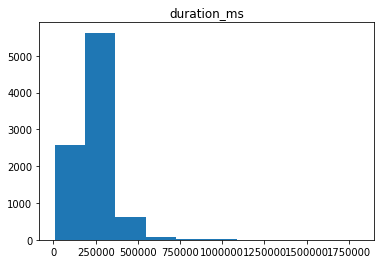

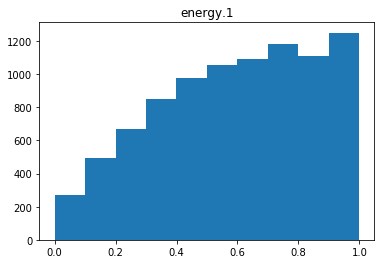

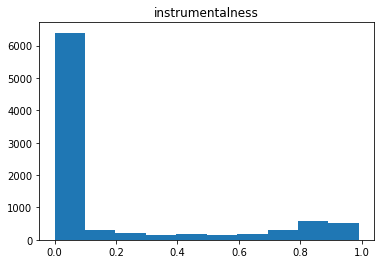

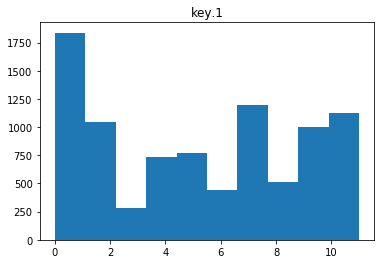

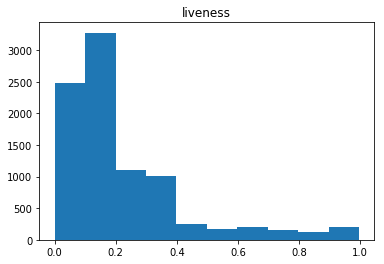

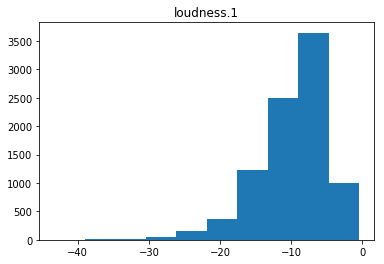

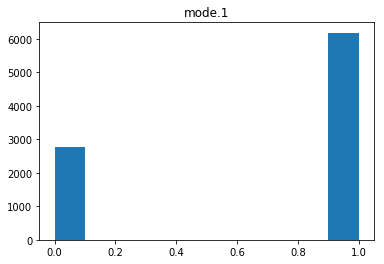

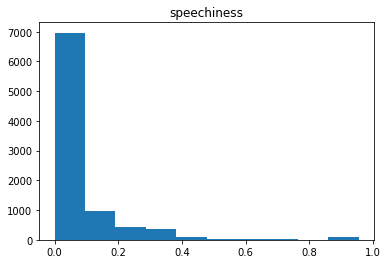

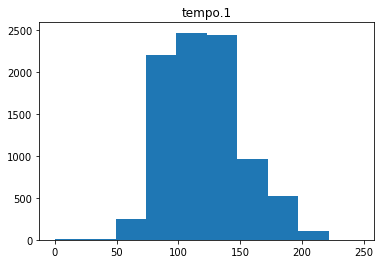

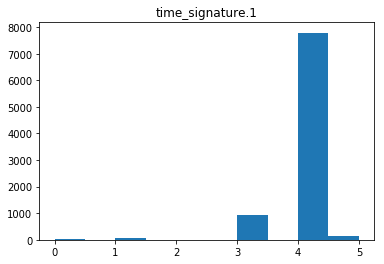

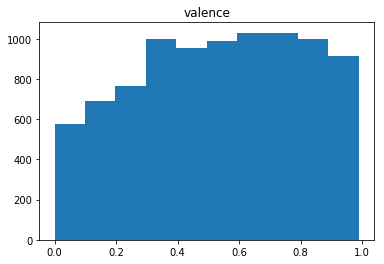

In [13]:
import matplotlib.pyplot as plt

for column in X_nonNans:
    if(column != 'artist_terms'):
        plt.figure()
        plt.title(column)
        plt.hist(X_nonNans[column])
        plt.show()
        plt.close()
#     print(column)

# plt.close()

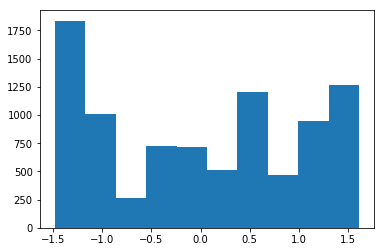

ValueError: could not convert string to float: "['christian rock' 'christian alternative rock' 'christian hip hop'\n 'modern rock' 'christian metal' 'alternative metal' 'nu metal'\n 'christian music' 'post-grunge' 'ccm' 'gospel' 'contemporary christian'\n 'grunge' 'alternative rock' 'hard rock' 'rock' 'emo' 'christian'\n 'alternative' 'punk' 'american' 'pop' 'texas' 'worship music' 'loud'\n 'international' 'earth']"

In [20]:
# # #standardize the data - did not help by itself 
# from sklearn import preprocessing
# import matplotlib.pyplot as plt

# # std_scale = preprocessing.StandardScaler().fit(X_nonNans)
# # X_standard = std_scale.transform(X_nonNans)

# # X_nonNans[12, :] = X_standard[12, :]

# # plt.figure()
# # #     plt.title(column)
# # plt.hist(X_nonNans['key'])

# plt.figure()
# # plt.title(column)
# plt.hist(X_nonNans['key'])
# plt.show()
# plt.close()

# scaled_features = X_nonNans.copy()
# col_names = ['key']
# features = scaled_features[col_names]
# scaler = preprocessing.StandardScaler().fit(scaled_features)
# features = scaler.transform(features.values)

# X_nonNans = X_nonNans.drop('key', axis = 1)
# X_nonNans['key'] = features

# plt.figure()
# # plt.title(column)
# plt.hist(features)
# plt.show()
# plt.close()
# #standardize acousticness

# scaled_features = X_nonNans.copy()
# col_names = ['acousticness']
# features = scaled_features[col_names]
# scaler = preprocessing.StandardScaler().fit(features.values)
# features = scaler.transform(features.values)

# X_nonNans = X_nonNans.drop('acousticness', axis = 1)
# X_nonNans['acousticness'] = features

# # plt.figure()
# # # plt.title(column)
# # plt.hist(X_nonNans['key'])
# # plt.show()
# # plt.close()

# # plt.figure()
# # # plt.title(column)
# # plt.hist(X_nonNans['acousticness'])
# # plt.show()
# # plt.close()


# # print(len(features))
# # print(len(X_nonNans['key']))

In [41]:
print(X_nonNans.head())

   artist_familiarity  artist_hotttnesss  artist_playmeid  artist_7digitalid  \
0            0.581794           0.401998             4479             165270   
1            0.630630           0.417500            22066               1998   
2            0.487357           0.343428            13951             290021   
3            0.630382           0.454231            12697              19072   
4            0.651046           0.401724             8355              30973   

   artist_latitude  artist_longitude  song_hotttnesss  \
0          0.00000           0.00000         0.602120   
1         35.14968         -90.04892         0.602120   
2         35.14968         -90.04892         0.602120   
3         35.14968         -90.04892         0.602120   
4         35.14968         -90.04892         0.604501   

                                        artist_terms  analysis_sample_rate  \
0  ['hip hop' 'underground rap' 'g funk' 'alterna...                 22050   
1  ['blue-eyed soul'

In [49]:
categories = ['classical', 'rock', 'pop', 'rap', 'blues', 'country', 'electronic', 'jazz', 'folk', 'latin']
df_categories = pd.DataFrame(columns=categories)
df_categories.head()


,classical,rock,pop,rap,blues,country,electronic,jazz,folk,latin


In [50]:
s = pd.concat([df_categories, X_nonNans])
print(s.head())

   acousticness  analysis_sample_rate  artist_7digitalid  artist_familiarity  \
0      0.063000               22050.0           165270.0            0.581794   
1      0.195000               22050.0             1998.0            0.630630   
2      0.000055               22050.0           290021.0            0.487357   
3      0.930000               22050.0            19072.0            0.630382   
4      0.324000               22050.0            30973.0            0.651046   

   artist_hotttnesss  artist_latitude  artist_longitude  artist_playmeid  \
0           0.401998          0.00000           0.00000           4479.0   
1           0.417500         35.14968         -90.04892          22066.0   
2           0.343428         35.14968         -90.04892          13951.0   
3           0.454231         35.14968         -90.04892          12697.0   
4           0.401724         35.14968         -90.04892           8355.0   

                                        artist_terms blues  ..

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [51]:
print(s.columns.values)

['acousticness' 'analysis_sample_rate' 'artist_7digitalid'
 'artist_familiarity' 'artist_hotttnesss' 'artist_latitude'
 'artist_longitude' 'artist_playmeid' 'artist_terms' 'blues' 'classical'
 'country' 'danceability' 'danceability.1' 'duration' 'duration_ms'
 'electronic' 'end_of_fade_in' 'energy' 'energy.1' 'folk'
 'instrumentalness' 'jazz' 'key' 'key.1' 'key_confidence' 'latin'
 'liveness' 'loudness' 'loudness.1' 'mode' 'mode.1' 'mode_confidence' 'pop'
 'rap' 'rock' 'song_hotttnesss' 'speechiness' 'start_of_fade_out' 'tempo'
 'tempo.1' 'time_signature' 'time_signature.1' 'time_signature_confidence'
 'valence']


In [52]:
# iterate and fill song genres based on artist_terms

for index, item in s.iterrows():
    curr_related_genres = s['artist_terms'][index].split('\' \'')
    
    # check if any artist_terms for that song contains a generic genre
    for genre in categories:
        if any(genre in g for g in curr_related_genres):
            s[genre][index] = 1
        else:
            s[genre][index] = 0

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [54]:
print(s.head())

   acousticness  analysis_sample_rate  artist_7digitalid  artist_familiarity  \
0      0.063000               22050.0           165270.0            0.581794   
1      0.195000               22050.0             1998.0            0.630630   
2      0.000055               22050.0           290021.0            0.487357   
3      0.930000               22050.0            19072.0            0.630382   
4      0.324000               22050.0            30973.0            0.651046   

   artist_hotttnesss  artist_latitude  artist_longitude  artist_playmeid  \
0           0.401998          0.00000           0.00000           4479.0   
1           0.417500         35.14968         -90.04892          22066.0   
2           0.343428         35.14968         -90.04892          13951.0   
3           0.454231         35.14968         -90.04892          12697.0   
4           0.401724         35.14968         -90.04892           8355.0   

                                        artist_terms blues  ..

In [55]:
s = s.drop('artist_terms', axis=1)

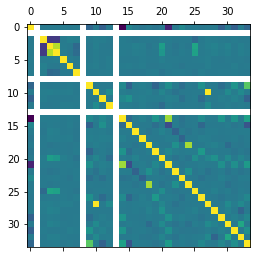

In [56]:
import matplotlib.pyplot as plt

plt.matshow(s.corr())
plt.show()

                           correlation
blues                        -0.208412
country                      -0.168260
jazz                         -0.160789
folk                         -0.132578
mode                         -0.076287
latin                        -0.072123
rock                         -0.071572
pop                          -0.071038
key_confidence               -0.050554
mode_confidence              -0.040224
artist_playmeid              -0.036433
classical                    -0.030832
liveness                     -0.015566
duration_ms                  -0.006658
key.1                        -0.003841
instrumentalness             -0.003668
end_of_fade_in               -0.000674
tempo.1                       0.000194
loudness.1                    0.001606
acousticness                  0.001850
danceability.1                0.002223
energy.1                      0.003955
mode.1                        0.005369
speechiness                   0.011023
time_signature.1         

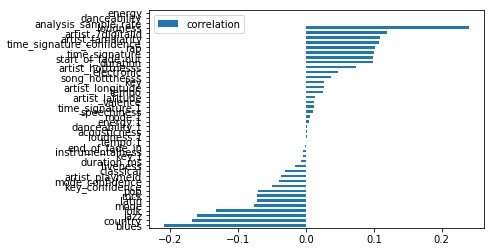

In [57]:
#correlation between features and the years
correlation = []
for column in s:
    correlation.append((s[column].astype(float)).corr(Y))
# print(correlation)

df = pd.DataFrame({'correlation': correlation}, index=s.columns)
df = df.sort_values(by=['correlation'])
ax = df.plot.barh(y='correlation')

print(df)

In [ ]:
#split data 
x_train, x_test, y_train, y_test = train_test_split(s, Y, test_size = 0.33, random_state = 42)

In [ ]:
# import xgboost as xgb

# dtrain = xgb.DMatrix(x_train, label=y_train)
# dtest = xgb.DMatrix(x_test)

# param = {'max_depth': 5, 'eta': 0.2, 'seed': 42, 'silent': 1}
# num_round = 5

# bst = xgb.train(param, dtrain, num_round)

# preds = bst.predict(dtest)

#simple linear regression 

from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

preds = regr.predict(x_test)

error = mean_squared_error(y_test, preds)
print(error)

In [ ]:
combined = s.join(Y)
combined.to_csv('FeatureEngineered_genre.csv', index=False)